## Boilerplate

In [1]:
%matplotlib inline

In [2]:
# Our standard set of imports for pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.weightstats as sms

from math import sqrt

# some imports to handle HTML requests and parsing the results
from StringIO import StringIO
import requests

## Hypothesis Tests in Python: From Scratch

### What's our plan for testing the IQ data?

* What's the basic question we're going to ask? 
    * Are we smarter than average
* Form a null hypothesis
* Generate a test statistic
* Check the surprise paradigm

What's missing from our bag our tricks?

### Previously, we used the Binomial Distribution for our model.

Does it make sense to use that model here? Does this "feel" like flipping a coin?

Not really. We need something else.

### Introducing the Central Limit Theorem

The arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.

The distribution of the mean will have:
* N = # Samples that we have
* $\mu_0$ = Population Mean
* $\sigma$ = Population standard deviation
* $SE = \frac{\sigma}{\sqrt{N}}$ = Standard Error = Std. Dev. of Sample Mean

### How Do We Use This?

The same exact way, except when we build our test stat, we test it against a Normal Distribution (sort of) not a Binomial.

### What's Our Test Statistic?

In this case, we'll do the following

$$
z = \frac{\bar{x} - \mu_{0}}{SE}
$$

where $\bar{x}$ is the sample mean and $\mu_0$ is the population mean, i.e. what we expect.

### Let's Start With Some Previously Collected Data

In [3]:
## Some Data From A Previous Run Of The Experiment

# set up the URL
url = 'https://docs.google.com/a/bu.edu/spreadsheets/d/'

# the unique key of the spreadsheet. The sheet must be open to "all"
key = '1mXsoSh_l_WeuJE1E5xjNfsI5yhgqSa3kCne4i65iyw4'

# some required formatting info. this requests CSV
export = '/export?format=csv&id='

# put together the string
urlString = url+key+export+key

# html request
data = requests.get(urlString).content

# and parsing the request into a DataFrame
df_old = pd.read_csv(StringIO(data))

# and let's make the relevant column name a bit easier to deal with
df_old.rename(columns={'My IQ is:': 'IQ'}, inplace=True)

In [4]:
df_old.sample(5)

,Timestamp,Username,IQ
38,9/13/2015,user39,110
5,9/13/2015,user6,95
28,9/13/2015,user29,112
35,9/13/2015,user36,85
42,9/13/2015,user43,100


In [5]:
df_old.describe()

,IQ
count,55.000000
mean,101.400000
std,13.370227
min,75.000000
25%,90.000000
50%,103.000000
75%,110.000000
max,133.000000


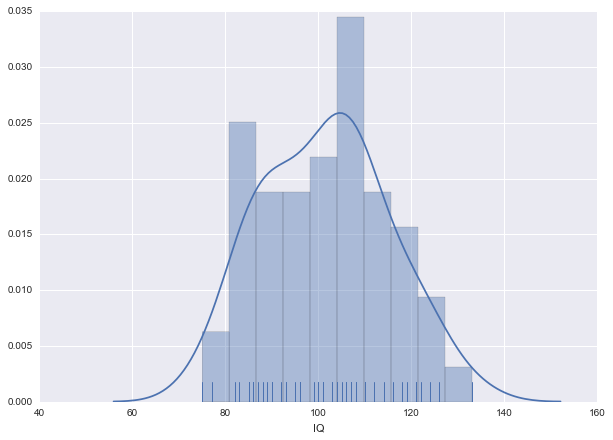

In [6]:
# let's get a distribution plot

g = sns.distplot(df_old.IQ,rug=True, bins=10);
g.figure.set_size_inches(10,7)

In [7]:
# we know the standard deviation of the population,
# so we can use a z-test
std = 15.0
mean_H0 = 100.0

N = df_old.IQ.count()
test_mean = df_old.IQ.mean()

SE = 15 / sqrt(N)

# create the test statistic
test_stat = abs(test_mean - mean_H0) / SE

print 'STD ERROR: ', SE
print 'TEST STAT: ', test_stat
print 'PVALUE:    ', 2*stats.norm.sf(test_stat)

STD ERROR:  2.02259958739
TEST STAT:  0.692178525462
PVALUE:     0.488825222849


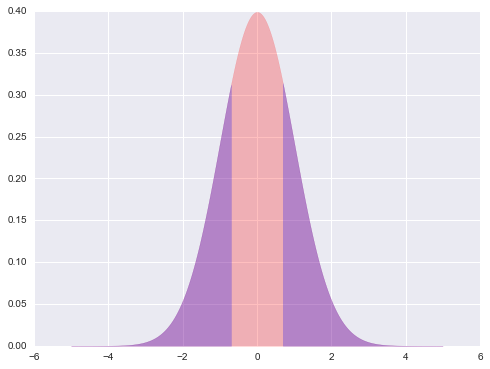

In [8]:
#plot the pdfs of these normal distributions
rv = stats.norm(loc = 0, scale = 1.0)
x = np.arange(-5,5,0.01)
x1 = np.arange(test_stat,5,0.01)
x2 = np.arange(-5,-test_stat,0.01)

plt.figure(figsize=(8,6))
plt.fill_between(x, rv.pdf(x), color='r',alpha=0.25)
plt.fill_between(x1, rv.pdf(x1), color='b',alpha=0.25)
plt.fill_between(x2, rv.pdf(x2), color='b',alpha=0.25)

### Pulling It All Together

Ok, so great, we use the Normal distribution to determine if we should be surprised by our test stat.

Not quite. It turns out we can't use the Normal unless we know the population std deviation.

If we have to estimate the population std deviation using the data, then we'll use the Student's T Distribution.

More "heavy tailed" than a Normal, but if the number of samples is large, then they're basically identical.

### Hypothesis Tests in Python Using A Library

Python doesn't provide a single sample z-test straight out of a library, so let's just use the t-test by default.

In general this is better for us anyway since we'll seldom have the population standard deviation.

## If p is low, the null must go, so what's our conclusion?

In [9]:
# Let's use the test in Scipy for our ttest
test_stat, pvalue = stats.ttest_1samp(df_old.IQ, popmean=100)

print 'T-TEST'
print '   TEST_STAT: ', test_stat
print '   P_VALUE:   ', pvalue

T-TEST
   TEST_STAT:  0.776552117418
   P_VALUE:    0.44081138373


## Let's Look At The Results of Our IQ Test

In [10]:
# set up the URL
url = 'https://docs.google.com/a/bu.edu/spreadsheets/d/'

# the unique key of the spreadsheet. The sheet must be open to "all"
key = '1xTQTjmrP9ldjw5hrATUZs3u_djagWKTF_0-pH2x0I-Y'

# some required formatting info. this requests CSV
export = '/export?format=csv&id='

# put together the string
urlString = url+key+export+key

# html request
data = requests.get(urlString).content

# and parsing the request into a DataFrame
df = pd.read_csv(StringIO(data))

# and let's make the relevant column name a bit easier to deal with
df.rename(columns={'My IQ is:': 'IQ'}, inplace=True)

In [11]:
df.describe()

,Timestamp,Username,IQ
count,0,0,0
unique,0,0,0


In [12]:
# let's get a distribution plot

# g = sns.distplot(df.IQ,rug=True, bins=10);
# g.figure.set_size_inches(10,7)